In [48]:
import netCDF4 as nc
import pylab as plt
import numpy as np
from mpl_toolkits.basemap import Basemap, shiftgrid

In [69]:
#extract data and separate variables
data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_cl.nc')
cl = data.variables['cl']
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]

/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


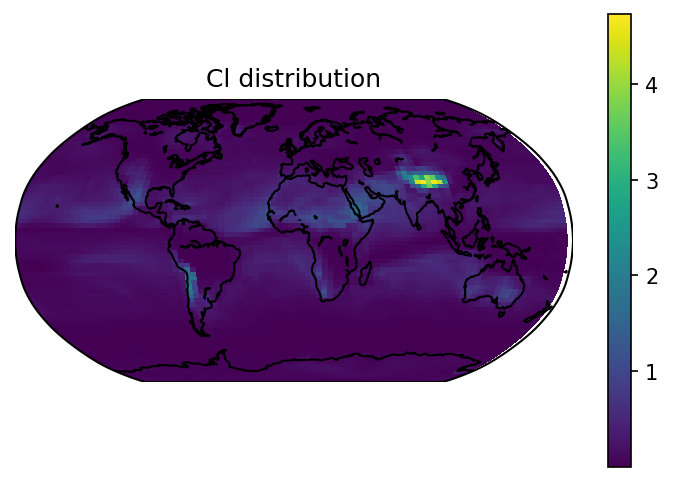

In [70]:
#make world map plot
plt.figure(dpi=150)
map = Basemap(projection='robin', lon_0=0.)
map.drawcoastlines()

cl, lon = shiftgrid(180.,cl,lon,start=False)
lonx,laty = np.meshgrid(lon,lat)
x,y=map(lonx,laty)

cs = map.pcolormesh(x,y,cl[0,0,:,:]*28.8/35.5*1e18)

plt.title('Cl distribution')
plt.colorbar()
plt.show()


Text(0, 0.5, 'Model height')

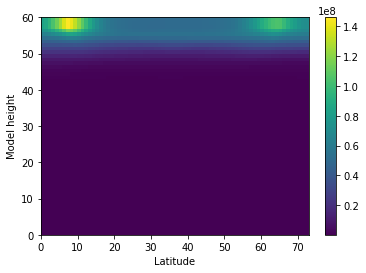

In [63]:
plt.pcolormesh(np.mean(data.variables['cl'][:]*28.8/35.5*1e18, axis=(0,3)))
#average over axes 0:time and 3:longitude to get zonal mean
plt.colorbar()

plt.xlabel('Latitude')
plt.ylabel('Model height')